# Data Mining - Lab 1
### Team 2 - Patricia Goresen, Jeffrey Lancon, Brychan Manry, George Sturrock
#### May 27, 2018
------

## Business Understanding

Since its inception, statistical data analysis has been an integral part of the game.  Coaches, players, and baseball fans can
recite many of these stats and often use them in coaching and team roster development decisions.  Books and movies have been based on the pursuit of utilizing baseball statistics to build the ultimate baseball team. They have even coined the term Sabermetrics: The empirical analysis of baseball, especially baseball statistics that measure in-game activity.

The book; Moneyball: The Art of Winning an Unfair Game by Michael Lewis and a film based on the book, staring Brad Pitt and Jonah Hill, are about Billy Bean, General Manager of the Oakland Athletics who focuses on player/team Sabermetrics to assemble a competitive baseball team using limited funding during the 2002 and 2003 seasons. Billy Bean was able to field a competitive team with a salary budget of less than half of their larger markets competitors, by focusing on hiring undervalued players.  Despite the salary roadblock, the Athletics made the playoffs in 2002 & 2003.

The source of baseball data for this lab is the Sean Lahman Baseball Database [
http://www.seanlahman.com/baseball-archive/statistics/].  Often cited as the most complete baseball database, the data set includes twenty-seven data tables and millions of records covering most non-proprietary baseball data pertaining to offense, fielding, pitching, payroll, player demographics, team statistics, manager data and much more.  For this lab, the focus will be on team level data.  The team level data will be explored using graphical analysis using standard python libraries.  After data exploration is complete, statistical methods can be employed to determine variable correlation and/or outcome prediction using techniques such as principle component analysis (PCA) or logistic regression.  Predictive models will be verified to assure the output is useful.  For example, a logistic regression model will have its assumptions validated, competing models will be compared using best practice measurements such as Area Under the Curve (AUC), Specificity, Sensitivity and Misclassification Scores.  The outcomes of this study could provide helpful insights for baseball fans who play fantasy sports, baseball reporters and baseball managers to assist with building a more competitive team.  

------

## Data Types and Meaning

The base team data from the Lahman baseball database contains forty-eight different attributes.  The team level data begins with the 1871 season and contains team level data thorugh the conclusion of the 2017 major league baseball season.  The grain of the team data is at the season and team level.  The attributes can be divided into four general categories:  informational, offense, batting and pitching.  Informational attributes are descriptive elements about the team.  These include unique team identifiers, league membership, division membership, post-season success indicators and home ballpark information.  Convential team offensive statistics such as total hits, at bats and home runs are also present.  Team Pitching statitistics such as earned run average (ERA), saves and strikeouts are available for analysis as well.  

In [1]:
import pandas as pd
pd.read_csv("./docobjects/DataTypeandMeaning.csv").style.hide_index()

Attribute,Category,Type,DF_Type,Description
yearID,Informational,Interval,int64,The professional baseball season.
lgID,Informational,Nominal,object,The league to which the team was a member during the specified year.
teamID,Informational,Nominal,object,Unique identifier for the professional baseball team.
franchID,Informational,Nominal,object,Unique identifier for the professional baseball franchise.
divID,Informational,Nominal,object,The division within the league to which the team belonged during the specified year.
Rank,Informational,Ordinal,int64,The team's finishing rank in their division for the specified year.
G,Informational,Interval,int64,The number of games played by the team during the specified year.
Ghome,Informational,Interval,float64,The number of home games played by the team during the specified year.
W,Informational,Interval,int64,Games won by the team during the year.
L,Informational,Interval,int64,Games lost by the team during the year.


------

## Data Quality

Overall, the team level data set is of high quality.  That being said, the data will be examined for missing values, unique identifiers, inconsistency between team names over time and any other anomalies which may arise.  The merger of the American and National Leagues, introduction of divisions, teams have gone out of business, new teams have been created, wild card playoffs, and evolving strategy makes data from approximately 150 years ago likely to be too dated (changed conditions) to be useful.  The data will be subsetted to only include those records from 1970 onwards. This date was chosen arbitrarily.  Data quality analysis will be conducted on this subset of the team data.  

_ Special Notation: _

1981: An MLB player’s strike in 1981 resulted in a shortened baseball season (±104 games).  There was postseason play that year.  

1994:  Because of another MLB player’s strike in 1994, the season ended prematurely. There was no postseason play that year.  

For both years, statistics for these years may appear to be outliers but are in fact actual results.

  #### Data Integrity

In an effort to confirm that the data contained within the Lahman's baseball dataset was indeed valid data, other historical baseball statistical data repositories were consulted to determine if the Lahman's datasets' values corresponded to these other datasets.

MLB datasets referenced were: a) MLB.com official dataset and b) Baseball-Reference.com MLB dataset.  While these dataset repositories did not contain all the same attributes, there were numerous attributes that were common to all dataset.  An excerpt from these datasets is included below.

A spot-check of the dataset was conducted using an arbitrary year (2009) and MLB teams (Arizona Diamondbacks, Chicago White Sox, Milwaukee Brewers, and San Francisco Giants.  The attributes that were common to all three data sources were compared.  As seen below, all 3 dataset’s attributes data were consistent.  This is strong evidence that the data within the Lahman’s dataset is valid.  


<center>LAHMAN'S BASEBALL DATASET - TEAMS.CSV  (2009 EXTRACT)</center>  

|franchID |	R |	AB |	H |	2B |	3B |	HR |	BB |	SO |	SB |	CS |	HBP |	SF |
|---------|---|----|------|----|-------|-------|-------|-------|-------|-------|-------|-------|
| ARI  |	720 |	5565 |	1408 |	307 |	45 |	173 |	571 |	1298 | 102 |	40 |	37 |	41 |
| CHW  |	724 |	5463 |	1410 |	246 |	20 |	184 |	534 |	1022 | 113 |	49 | 	62 |	39 |
| MIL  |	785 |	5510 |	1447 |	281 |	37 |	182 |	610 |	1231 |  68 |	37 |	71 |	47 |
| SFG  |	657 |	5493 |	1411 |	275 |	43 |	122 |	392 |	1158 |  78 |	28 |	50 |	55 |

<br>
<br>
 <center>MLB.COM BASEBALL DATASET - TEAM LEVEL STATISTICS  (2009 EXTRACT)</center>
 <center>Weblink:	https://goo.gl/LxFDxZ  <center>  
    
|Team     |	R   |	AB   |	H    |	 2B |	3B | 	 HR |	 BB |	  SO |	SB |	CS |	HBP |	SF |
|---------|---  |--------|-------|------|------|--------|-------|--------|-----|-------|--------|------|
| ARI     |	720 |	5565 |	1408 |	307 |	45 |	173 |	571 |	1298 | 102 |	40 |	 37 |	41 |
| CHW     |	724 |	5463 |	1410 |	246 |	20 |	184 |	534 |	1022 | 113 |	49 | 	 62 |	39 |
| MIL     |	785 |	5510 |	1447 |	281 |	37 |	182 |	610 |	1231 |  68 |	37 |	 71 |	47 |
| SFG     |	657 |	5493 |	1411 |	275 |	43 |	122 |	392 |	1158 |  78 |	28 |	 50 |	55 |

<br>
<br>
 <center>BASEBALL-REFERENCE.COM  MLB DATASET - TEAM LEVEL STATISTICS  (2009 EXTRACT)</center>
 <center>Weblink:	https://www.baseball-reference.com/leagues/MLB/2009.shtml  <center>  
    
|Team     |	R   |	AB   |	H    |	 2B |	3B | 	 HR |	 BB |	  SO |	SB |	CS |	HBP |	SF |
|---------|---  |--------|-------|------|------|--------|-------|--------|-----|-------|--------|------|
| ARI     |	720 |	5565 |	1408 |	307 |	45 |	173 |	571 |	1298 | 102 |	40 |	 37 |	41 |
| CHW     |	724 |	5463 |	1410 |	246 |	20 |	184 |	534 |	1022 | 113 |	49 | 	 62 |	39 |
| MIL     |	785 |	5510 |	1447 |	281 |	37 |	182 |	610 |	1231 |  68 |	37 |	 71 |	47 |
| SFG     |	657 |	5493 |	1411 |	275 |	43 |	122 |	392 |	1158 |  78 |	28 |	 50 |	55 |

 

In [118]:
import numpy as np
import os
import string
from matplotlib import pyplot as plt
import seaborn as sns

#Read Teams data file
teams = pd.read_csv('./sourcedata/Teams.csv')
#Select rows where year > 1969
teams2 = teams[teams.yearID > 1969]
teams2.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1541,1970,NL,ATL,ATL,W,5,162,81.0,76,86,...,118,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.0,106,106,ATL,ATL,ATL
1542,1970,AL,BAL,BAL,E,1,162,81.0,108,54,...,148,0.981,Baltimore Orioles,Memorial Stadium,1057069.0,101,98,BAL,BAL,BAL
1543,1970,AL,BOS,BOS,E,3,162,81.0,87,75,...,131,0.974,Boston Red Sox,Fenway Park II,1595278.0,108,107,BOS,BOS,BOS
1544,1970,AL,CAL,ANA,W,3,162,81.0,86,76,...,169,0.980,California Angels,Anaheim Stadium,1077741.0,96,97,CAL,CAL,CAL
1545,1970,AL,CHA,CHW,W,6,162,84.0,56,106,...,187,0.975,Chicago White Sox,Comiskey Park,495355.0,101,102,CHW,CHA,CHA


#### Identify Uniqueness Issues within Each Column

The following script shows there are no columns with the same value is each row.  There are four columns where there are only three unique values.  This is to be expected as these are binary indicators.  Missing values in these columns will be examined later in this section.  Alternatively, there are no columns where each row contains a different value.  The attendance column contains many unique values, which is to be expected.  Attendance can realistically be as low as a five-digit integer and as high as a six-digit integer.  In summary, there are no issues with regards to non-uniqueness or over-uniqueness in the subset team data set.  

In [119]:
#Count Unique Values for each column
teamUnique = teams2.nunique(dropna = False)
print(teamUnique)

yearID              48
lgID                 2
teamID              36
franchID            30
divID                3
Rank                 7
G                   27
Ghome               32
W                   68
L                   70
DivWin               3
WCWin                3
LgWin                3
WSWin                3
R                  393
AB                 450
H                  406
2B                 202
3B                  58
HR                 197
BB                 334
SO                 625
SB                 194
CS                  98
HBP                 88
SF                  56
RA                 416
ER                 390
ERA                258
CG                  71
SHO                 25
SV                  56
IPouts             309
HA                 431
HRA                174
BBA                325
SOA                635
E                  123
DP                 116
FP                  24
name                36
park                88
attendance        1323
BPF        

#### Team / Franchise Categorical Variable

Between 1970 and 2017, there were three different MLB expansions which established new franchises.

| Year |Franchise Name | FrancID |
|----------|----------------|--------------|
| 1977 | Seattle Seahawks | SEA |
| 1977 | Toronto Blue Jays | TOR |
| 1993 | Colorado Rockies | COL |
| 1993 | Florida Marlins | FLA |
| 1998 | Arizona Diamondbacks | ARI |
| 1998 | Tampa Bay Devil Rays | TBD |

During this same time, several teams changed names and/or locations.  This is also evident upon inspection of the dataset.

| teamID |Frequency |
|----------|----------------|
| teamID | 36 |
| francID | 30 |

As of 1998, there were 30 different MLB franchises.  More than one teamID can reference a single franchise. 
Example: Florida [franchID: FLA] has two different teamIDs; Florida Marlins [TeamID: FLO] are now known as the Miami Marlins [TeamID: MIA].

Because teamID not a unique identifier of an MLB franchise, we will use francID as the primary identifier of an MLB team.

------

In [120]:
#Print basic stats for attendance to address any concerns about this column being overly unique
pd.set_option('display.float_format', lambda x: '%.2f' % x)
teams2.attendance.describe()

count      1324.00
mean    2049799.53
std      792309.99
min      306763.00
25%     1439223.75
50%     2001874.50
75%     2588625.00
max     4483350.00
Name: attendance, dtype: float64

#### Check for Columns with high levels of missing data

Only four columns in the teams data set have missing values.  None of these columns have missing values for every row in the subset team data set.  The missing values in the "DivWin", "LgWin" and "WSWin" columns are due to the baseball players strike in 1994 which caused the season to end prematurely.  There were no post season games in 1994.  The 640 missing values in "WCWin" are due to the wild card playoff system being introduced in the 1995 season.  The missing values are accurate missing values due to the 1994 players strike and the introduction of the wild card post season format in 1995.  

In [121]:
teamNullCols = teams2.isnull().sum()
teamNullCols = teamNullCols[teamNullCols > 0]
teamNullCols = pd.DataFrame({
    'n Missing' : teamNullCols,
    '% Missing' : ((teamNullCols / teams2.shape[0])*100).round(2)#.astype(str) + "%"
})#.style.apply(highlight_high, ul=.3, subset = ['% Missing'])

cm = sns.light_palette("red", as_cmap=True)
teamNullCols.style.background_gradient(cmap=cm)


,% Missing,n Missing
DivWin,2.11,28
WCWin,48.34,640
LgWin,2.11,28
WSWin,2.11,28


#### Additional Data Quality Checks???

Please insert any additional details.

In [122]:
#Numeric Corr
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "6pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

teams2Numeric = teams2.select_dtypes(exclude=['object'])
teamCorrMat = teams2Numeric.corr()
teamCorrMat.style.background_gradient(sns.diverging_palette(5, 250, as_cmap=True), axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Numeric Variable Correlation Heatmap")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [123]:
# Highest Correlation Pairs
corrPairs = teamCorrMat.abs().unstack().sort_values(kind="quicksort")
#- REMOVE DUPLICATES
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
corrPairs[corrPairs > 0.7]

HA      Ghome    0.71
        G        0.72
2B      R        0.72
ERA     HRA      0.72
Ghome   H        0.73
IPouts  H        0.73
G       H        0.74
R       HR       0.75
RA      HRA      0.75
SOA     yearID   0.75
yearID  SO       0.75
AB      HA       0.76
SOA     SO       0.77
W       Rank     0.77
Rank    L        0.78
ER      HRA      0.80
CG      yearID   0.83
H       R        0.83
HA      ER       0.83
H       AB       0.84
HA      RA       0.85
ERA     RA       0.88
        ER       0.90
E       FP       0.94
Ghome   AB       0.96
IPouts  AB       0.97
Ghome   IPouts   0.97
G       AB       0.98
PPF     BPF      0.98
Ghome   G        0.98
ER      RA       0.99
G       IPouts   0.99
dtype: float64

------

## New Features

The team level data set presents opportunities to augment the data with common hitting and pitching ratios as well as merging data from additional tables.  In this section, payroll data will be summarized and merged with the Team data table.  New features will be created based on data present in the team table.  WHIP (walk and hits per innings pitched), strikeout to walk ratio, team batting average, slugging percentage, strikeout per at bat, on base percentage and OPS (on base plus slugging percentage) will all be added as new columns for the team data table.  Finally, a yes/no playoff flag will be added to show if the team made the playoffs each season.  

| Attribute | Category      | Type     | DF_Type | Description                                             |
|-----------|---------------|----------|---------|---------------------------------------------------------|
| Payroll   | Informational | Interval | float64 | Total team payroll.                                     |
| WHIP      | Pitching      | Ratio    | float64 | Walk and hits per innings pitched.                      |
| KBB       | Pitching      | Ratio    | float64 | Strikout to walk ratio.                                 |
| Bavg      | Batting       | Ratio    | float64 | Team batting average.                                   |
| Slug      | Batting       | Ratio    | float64 | Team slugging percentage.                               |
| KAB       | Batting       | Ratio    | float64 | Team strikeouts per at bat.                             |
| OBP       | Batting       | Ratio    | float64 | Team on base percentage.                                |
| OPS       | Batting       | Ratio    | float64 | Team on base + slugging percentage.                     |
| Playoff   | Informational | Nominal  | object  | Binary indicator showing is the team made the playoffs. |

#### Create Informational Columns

In [124]:
#Create Payroll Column

#Read salary data table
salaries = pd.read_csv("./sourcedata/Salaries.csv")
salaries.info()

#Summarize Salaries Table by year and team
summarisedSal = pd.DataFrame(salaries.groupby(['yearID', 'teamID']).sum().reset_index())
print(summarisedSal)

#Merge Summarized Salaries with Teams table.
teams2Plus = pd.merge(left=teams2, right=summarisedSal, how='left', on=['yearID', 'teamID'])
teams2Plus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB
     yearID teamID     salary
0      1985    ATL   14807000
1      1985    BAL   11560712
2      1985    BOS   10897560
3      1985    CAL   14427894
4      1985    CHA    9846178
5      1985    CHN   12702917
6      1985    CIN    8359917
7      1985    CLE    6551666
8      1985    DET   10348143
9      1985    HOU    9993051
10     1985    KCA    9321179
11     1985    LAN   10967917
12     1985    MIN    5764821
13     1985    ML4   11284107
14     1985    MON    9470166
15     1985    NYA   14238204
16     1985    NYN   10834762
17     1985    OAK    9058606
18     1985    PHI   10124966
19     1985    PIT    9227500
20     1985    SDN   11036583
21     1985   

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
0,1970,NL,ATL,ATL,W,5,162,81.00,76,86,...,0.98,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.00,106,106,ATL,ATL,ATL,nan
1,1970,AL,BAL,BAL,E,1,162,81.00,108,54,...,0.98,Baltimore Orioles,Memorial Stadium,1057069.00,101,98,BAL,BAL,BAL,nan
2,1970,AL,BOS,BOS,E,3,162,81.00,87,75,...,0.97,Boston Red Sox,Fenway Park II,1595278.00,108,107,BOS,BOS,BOS,nan
3,1970,AL,CAL,ANA,W,3,162,81.00,86,76,...,0.98,California Angels,Anaheim Stadium,1077741.00,96,97,CAL,CAL,CAL,nan
4,1970,AL,CHA,CHW,W,6,162,84.00,56,106,...,0.97,Chicago White Sox,Comiskey Park,495355.00,101,102,CHW,CHA,CHA,nan


In [125]:
#Create Playoff Indicator
teams2Plus['Playoff'] = teams2Plus.DivWin

if (teams2Plus.WCWin.any() == 'Y'):
    teams2Plus.Playoff = 'Y'

#### Create Pitching Columns

In [126]:
#Create WHIP - (Walks + Hits) / Innings Pitched
teams2Plus['WHIP'] = (teams2Plus.BBA + teams2Plus.HA) / (teams2Plus.IPouts / 3)

#Create Strikeout to Walk Ratio (KBB)
teams2Plus['KBB'] = (teams2Plus.SOA / teams2Plus.BBA)

#### Create Hitting Columns

In [127]:
#Strikeouts per At Bat (KAB)
teams2Plus['KAB'] = (teams2Plus.SO / teams2Plus.AB)

#Batting Average (Bavg)
teams2Plus['Bavg'] = (teams2Plus.H / teams2Plus.AB)

#Slugging Percentage (Slug)
##(Singles + Doubles*2 + Triples*3 + HR*4)/AB
teams2Plus['Slug'] = ((teams2Plus.H - teams2Plus['2B'] - teams2Plus['3B'] - teams2Plus.HR) + (teams2Plus['2B']*2) + (teams2Plus['3B']*3) + (teams2Plus.HR*4)) / teams2Plus.AB

#On Base Percentage (OBP)
##OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies
teams2Plus['OBP'] = (teams2Plus.H + teams2Plus.BB + teams2Plus.HBP) / (teams2Plus.AB + teams2Plus.BB + teams2Plus.HBP + teams2Plus.SF)

#On Base Percentage Plus Slugging (OPS)
teams2Plus['OPS'] = teams2Plus.Slug + teams2Plus.OBP

teams2Plus.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,teamIDretro,salary,Playoff,WHIP,KBB,KAB,Bavg,Slug,OBP,OPS
1319,2017,NL,SLN,STL,C,3,162,81.00,83,79,...,SLN,nan,N,1.30,2.74,0.25,0.26,0.43,0.33,0.76
1320,2017,AL,TBA,TBD,E,3,162,81.00,80,82,...,TBA,nan,N,1.26,2.69,0.28,0.24,0.42,0.32,0.74
1321,2017,AL,TEX,TEX,W,4,162,81.00,78,84,...,TEX,nan,N,1.40,1.98,0.27,0.24,0.43,0.32,0.75
1322,2017,AL,TOR,TOR,E,4,162,81.00,76,86,...,TOR,nan,N,1.37,2.50,0.24,0.24,0.41,0.31,0.72
1323,2017,NL,WAS,WSN,E,1,162,81.00,97,65,...,WAS,nan,Y,1.24,2.94,0.24,0.27,0.45,0.33,0.78


## Simple Statistics

In [63]:
statsdf = teams2[['W' , 'G', 'L' , 'R' , 'AB', 'H', '2B', '3B','attendance' ,'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG']]
statsdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,1324.0,7.962160e+01,12.214307,37.00,7.100000e+01,80.00,89.00,116.00
G,1324.0,1.593112e+02,10.395788,103.00,1.620000e+02,162.00,162.00,164.00
L,1324.0,7.962160e+01,12.183760,40.00,7.100000e+01,79.00,88.00,119.00
R,1324.0,7.105355e+02,98.024837,329.00,6.500000e+02,710.00,772.00,1009.00
AB,1324.0,5.438106e+03,363.166556,3493.00,5.456000e+03,5515.00,5577.25,5781.00
H,1324.0,1.415644e+03,122.228377,797.00,1.363750e+03,1426.50,1489.25,1684.00
2B,1324.0,2.608943e+02,41.328589,119.00,2.340000e+02,265.00,289.25,376.00
3B,1324.0,3.260650e+01,10.236212,5.00,2.500000e+01,32.00,39.00,79.00
attendance,1324.0,2.049800e+06,792309.990744,306763.00,1.439224e+06,2001874.50,2588625.00,4483350.00
HR,1324.0,1.476979e+02,41.167956,32.00,1.180000e+02,147.00,175.00,264.00


The mean, standard deviation, min, max, and 25%, 50% and 75% quartiles for the continuous variables are shown above. 

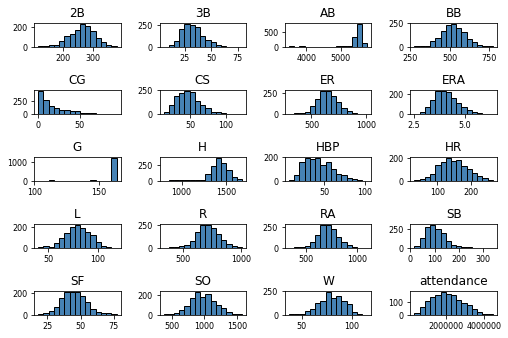

In [71]:
statsdf.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 
plt.show()

The histograms for the continuous variables are plotted above. Overall, the variables are fairly normally distributed. The variables 'AB' , 'G' , 'H'  are right skewed. These are expected to be right skewed as most teams play around the
same number of total games and home games per season. The total number at bat is also right skewed as it is related to the number of games played. The variables 'CG' , '3B' and 'SB' are left skewed. This is expected as the majority of games played are completed. Triples are harder and as a result, less common than singles or doubles, so it's expected less plays are triples. The same logic is true for stolen bases.

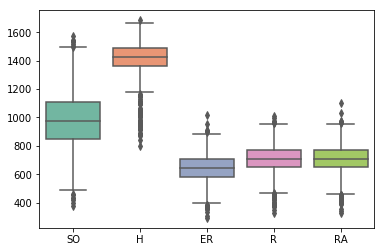

In [100]:
statsdf = teams2[['SO' , 'H', 'ER' , 'R' , 'RA']]
sns.boxplot(data=statsdf, palette="Set2")
plt.show()

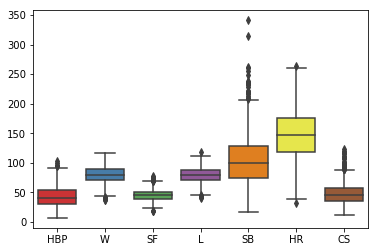

In [99]:
statsdf2 = teams2[['HBP', 'W', 'SF', 'L', 'SB', 'HR', 'CS']]
sns.boxplot(data=statsdf2, palette="Set1")
plt.show()

## Visualize Attributes

#### A Closer Look into Some of the Attributes

##### Attendance

In [165]:
teams2Plus['attendance'].describe()

count      1324.00
mean    2049799.53
std      792309.99
min      306763.00
25%     1439223.75
50%     2001874.50
75%     2588625.00
max     4483350.00
Name: attendance, dtype: float64

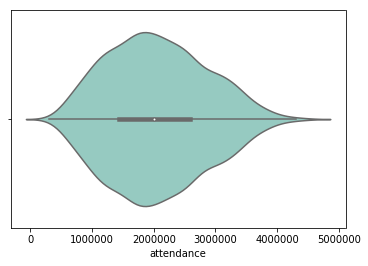

In [164]:
sns.violinplot(x=teams2["attendance"], palette = 'Set3')
plt.show()

The violin plot for total home game attendance is shown above. As shown in the plot, attendance is fairly normally distributed. The most common total attendance number is 2,000,000 fans. The occurances of 4,000,000+ are most likely due to long play off runs and bigger stadiums.

##### Payroll

In [163]:
teams2Plus['salary'].describe()

count         918.00
mean     60042632.63
std      43309923.78
min        880000.00
25%      25435708.25
50%      50537324.00
75%      84416082.75
max     231978886.00
Name: salary, dtype: float64

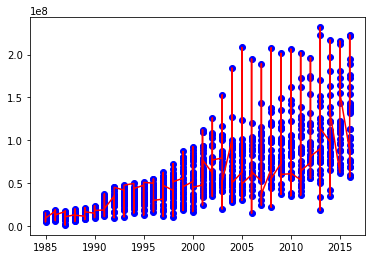

In [184]:
salary = teams2Plus['salary'][np.logical_not(np.isnan(teams2Plus['salary']))]
plt.scatter(teams2Plus['yearID'], teams2Plus['salary'], color='blue');
plt.plot(teams2Plus['yearID'], teams2Plus['salary'], color = 'red')
plt.show()

The figure above shows the scatter plot of the total team's payroll plotted against the year. Overall, the payroll amount seems to be increasing. However, there does seem to be quite a few team's payrolls that have not increased by a significant amount since 1985. Additionally, they years 1985 through about 1996 do not have a significant range between payroll ranges. There seems to be a significant increase in payroll range in the year 2001 and continues throughout.

##### Strikeouts to Walks

In [174]:
teams2Plus['KBB'].describe()

count   1324.00
mean       1.91
std        0.45
min        1.03
25%        1.59
50%        1.83
75%        2.17
max        3.98
Name: KBB, dtype: float64

##### BAvg

##### KAB

##### OBP

# Joint Attributes

### Payrolls between Teams and Playoff Status

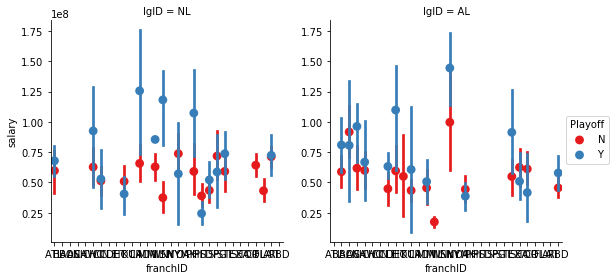

In [143]:
sns.factorplot(x="franchID", y="salary", hue="Playoff", col="lgID", data=teams2Plus, join= False , palette="Set1");
plt.show()

From the plots above, it does not seem as though there is a significant relationship between whether or not a team made the playoffs and the total team payroll. The American League does not have a big difference in salaries overall. The National League seems to have a bigger difference in salaries between teams however, the total team payroll does not seem to play a significant factor in playoff status. 